## 2. Data Understanding

We will make use of the datasets from Zindi, which is the largest professional network for data scientists in Africa.In particular we will be focusing on  3 different datasets for both train and test.

> a) Demographic data
* customerid(primary key) - Ensures traceability of borrowers' histories across datasets
* birthdate (date of birth of the customer) - Provides insight into borrowers' age, a factor often correlated with financial stability and the ability to meet loan obligation.
* bank_account_type (type of primary bank account) - 
* latitude_gps / longitude_gps - Allows for assessment of regional risk factors that can affect borrowers' repayment tendencies.
* bank_name_clients (name of the bank) - Choice of bank 
* bank_branch_clients(location of the branch) - Provides additional context on borrowers' banking relationship.
* employment_status_clients - Critical factor in determining their income stability and ability to repay loans
* level_of_education_clients (highest level of education) - Reflects their financial literacy and potential income level, affecting loan behaviour.

> b) Perfomance data
* customerid(primary key) - Ensures the association of loan performance with individual borrowers.
* systemloanid(id associated with the particular loan) - Allows for the tracking of specific loan histories.
* loannumber(number of loan we are predicting) - Helps understand a borrower's history of loan applications and their ability to manage multiple financial commitments.
* approveddate(date loan was approved) - Allows for historical trend analysis in loan approval since economic conditions and lending policies may change over time.
* loan amount - Critical predictor of loan default since larger loans may pose greater repayment challenges, increasing the risk of default.
* totaldue - Helps assess the borrower's capacity to meet their financial obligations.
* termdays - Longer-term loans may have different default patterns compared to shorter-term loans
* refferedby - 
* good_bad_flag(good = settled loan on time; bad = did not settled loan on time) - Accurate prediction of good_bad_flag is the central objective of the project

> c) Previous loans data
* customerid - 
* systemloanid
* loannumber(the number of the loan that we will predict) - Helps understand borrowers' historical borrowing patterns and their potential influence on current default 
* approveddate - 
* creationdate(date the loan was created)
* loanamount
* totaldue
* closeddate
* refferedby
* firstduedate
* firstpaiddate


## 3. Data Preparation

### Importing Libraries

In [89]:
# Basic data manipultion and analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import os
# print(os.getcwd())

In [90]:
# Loading the datasets
train_demographics = pd.read_csv("data/traindemographics.csv")
train_perf = pd.read_csv("data/trainperf.csv")
train_prev_loans = pd.read_csv("data/trainprevloans.csv")
test_demographics = pd.read_csv("data/testdemographics.csv")
test_perf = pd.read_csv("data/testperf.csv")
test_prev_loans = pd.read_csv("data/testprevloans.csv")

In [91]:
#viewing the dataset info
train_prev_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [92]:
#describing the dataset
test_prev_loans.describe(include='all')

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
count,5907,5.907000e+03,5907.000000,5907,5907,5907.000000,5907.000000,5907.000000,5907,325,5907,5907
unique,1442,NaN,NaN,5905,5903,NaN,NaN,NaN,5886,176,356,5887
top,8a858ff554e290e10154fe4e6b3f648c,NaN,NaN,2017-05-24 18:00:34.000000,2016-11-11 18:32:20.000000,NaN,NaN,NaN,2017-07-25 05:45:01.000000,8a858f5a57519e48015774cfff892e8d,2017-07-03 00:00:00.000000,2017-06-13 00:00:00.000000
freq,33,NaN,NaN,2,2,NaN,NaN,NaN,2,7,126,4
mean,NaN,3.018374e+08,4.194176,NaN,NaN,16271.711529,19334.173421,26.762316,NaN,NaN,NaN,NaN
std,NaN,9.552391e+04,3.406739,NaN,NaN,9280.598734,10369.677671,10.593658,NaN,NaN,NaN,NaN
min,NaN,3.016001e+08,1.000000,NaN,NaN,1000.000000,1112.500000,15.000000,NaN,NaN,NaN,NaN
25%,NaN,3.017736e+08,2.000000,NaN,NaN,10000.000000,11500.000000,15.000000,NaN,NaN,NaN,NaN
50%,NaN,3.018547e+08,3.000000,NaN,NaN,10000.000000,13000.000000,30.000000,NaN,NaN,NaN,NaN
75%,NaN,3.019191e+08,6.000000,NaN,NaN,20000.000000,24500.000000,30.000000,NaN,NaN,NaN,NaN


In [93]:
train_demographics.describe(include='all')

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
count,4346,4346,4346,4346.000000,4346.000000,4346,51,3698,587
unique,4334,3297,3,NaN,NaN,18,45,6,4
top,8a858fca5c35df2c015c39ad8695343e,1983-10-19 00:00:00.000000,Savings,NaN,NaN,GT Bank,OGBA,Permanent,Graduate
freq,2,5,3425,NaN,NaN,1598,3,3146,420
mean,NaN,NaN,NaN,4.626189,7.251356,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,7.184832,3.055052,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-118.247009,-33.868818,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.354953,6.470610,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.593302,6.621888,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,6.545220,7.425052,NaN,NaN,NaN,NaN


In [94]:
train_demographics.describe(include='all')

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
count,4346,4346,4346,4346.000000,4346.000000,4346,51,3698,587
unique,4334,3297,3,NaN,NaN,18,45,6,4
top,8a858fca5c35df2c015c39ad8695343e,1983-10-19 00:00:00.000000,Savings,NaN,NaN,GT Bank,OGBA,Permanent,Graduate
freq,2,5,3425,NaN,NaN,1598,3,3146,420
mean,NaN,NaN,NaN,4.626189,7.251356,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,7.184832,3.055052,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-118.247009,-33.868818,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.354953,6.470610,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.593302,6.621888,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,6.545220,7.425052,NaN,NaN,NaN,NaN


In [95]:
train_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


In [96]:
test_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customerid    1450 non-null   object 
 1   systemloanid  1450 non-null   int64  
 2   loannumber    1450 non-null   int64  
 3   approveddate  1450 non-null   object 
 4   creationdate  1450 non-null   object 
 5   loanamount    1450 non-null   int64  
 6   totaldue      1450 non-null   float64
 7   termdays      1450 non-null   int64  
 8   referredby    184 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 102.1+ KB


### Merging the train data

In [97]:
#checking the shapes of the train data
print (train_demographics.shape)
print (train_perf. shape)
print (train_prev_loans.shape)

(4346, 9)
(4368, 10)
(18183, 12)


#### The `trainperf` and `train_prev_loans` have same columns names. The columns names are renamed by adding `.perf` and `.prev`

In [98]:
columns_to_update = ['systemloanid', 'loannumber', 'approveddate', 'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby']
train_perf.columns = [col + '.perf' if col in columns_to_update else col for col in train_perf.columns]

train_prev_loans.columns = [col + '.prev' if col in columns_to_update else col for col in train_prev_loans.columns]
print (train_perf. columns)
print(train_prev_loans.columns)

Index(['customerid', 'systemloanid.perf', 'loannumber.perf',
       'approveddate.perf', 'creationdate.perf', 'loanamount.perf',
       'totaldue.perf', 'termdays.perf', 'referredby.perf', 'good_bad_flag'],
      dtype='object')
Index(['customerid', 'systemloanid.prev', 'loannumber.prev',
       'approveddate.prev', 'creationdate.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'closeddate', 'referredby.prev',
       'firstduedate', 'firstrepaiddate'],
      dtype='object')


In [99]:
# Merging the training data using customer id as the key value
train_data = pd.merge(train_prev_loans, train_demographics, on='customerid', how='left')
merged_data = pd.merge(train_data, train_perf, on='customerid', how='left')
merged_data.shape


(18203, 29)

In [100]:
merged_data.columns

Index(['customerid', 'systemloanid.prev', 'loannumber.prev',
       'approveddate.prev', 'creationdate.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'closeddate', 'referredby.prev',
       'firstduedate', 'firstrepaiddate', 'birthdate', 'bank_account_type',
       'longitude_gps', 'latitude_gps', 'bank_name_clients',
       'bank_branch_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid.perf', 'loannumber.perf',
       'approveddate.perf', 'creationdate.perf', 'loanamount.perf',
       'totaldue.perf', 'termdays.perf', 'referredby.perf', 'good_bad_flag'],
      dtype='object')

In [101]:
merged_data

,customerid,systemloanid.prev,loannumber.prev,approveddate.prev,creationdate.prev,loanamount.prev,totaldue.prev,termdays.prev,closeddate,referredby.prev,...,level_of_education_clients,systemloanid.perf,loannumber.perf,approveddate.perf,creationdate.perf,loanamount.perf,totaldue.perf,termdays.perf,referredby.perf,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,...,Post-Graduate,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,...,Post-Graduate,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,...,Post-Graduate,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,...,NaN,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,...,NaN,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18198,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,NaN,...,Graduate,301971504,14,2017-07-10 13:58:41.000000,2017-07-10 12:57:31.000000,30000.0,33000.0,30,NaN,Bad
18199,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,NaN,...,Graduate,301971504,14,2017-07-10 13:58:41.000000,2017-07-10 12:57:31.000000,30000.0,33000.0,30,NaN,Bad
18200,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,NaN,...,Graduate,301971504,14,2017-07-10 13:58:41.000000,2017-07-10 12:57:31.000000,30000.0,33000.0,30,NaN,Bad
18201,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45.000000,2016-08-27 19:03:34.000000,10000.0,13000.0,30,2016-10-15 10:17:54.000000,NaN,...,NaN,301996908,2,2017-07-26 12:48:14.000000,2017-07-26 11:46:58.000000,10000.0,13000.0,30,NaN,Bad


### Test Data

In [102]:
#test shape
print (test_demographics.shape)
print (test_perf. shape)
print (test_prev_loans.shape)

(1487, 9)
(1450, 9)
(5907, 12)


In [103]:
# Merging the testing data
testing_data = pd.merge(test_prev_loans, test_demographics, on='customerid', how='left')
test_data = pd.merge(testing_data, test_perf, on='customerid', how='left')
test_data.shape

(5907, 28)

In [104]:
test_data

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,closeddate,referredby_x,...,employment_status_clients,level_of_education_clients,systemloanid_y,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,referredby_y
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,NaN,...,NaN,NaN,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,NaN,...,NaN,NaN,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,NaN,...,NaN,NaN,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,2016-07-04 11:34:04.000000,NaN,...,Permanent,NaN,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,2016-06-02 00:02:58.000000,NaN,...,Permanent,NaN,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5902,8a858f085b494826015b54a0b2a1093b,301861709,1,2017-04-09 23:04:32.000000,2017-04-09 22:04:10.000000,10000.0,13000.0,30,2017-05-02 22:27:03.000000,8a858e4f5929c3df0159420645f46f55,...,NaN,NaN,301958882,4,21:10.0,21:04.0,20000,24500.0,30,8a858e4f5929c3df0159420645f46f55
5903,8a858f565b683b56015b7391c2617960,301869817,1,2017-04-15 23:33:17.000000,2017-04-15 22:33:05.000000,10000.0,11500.0,15,2017-04-25 19:32:42.000000,NaN,...,NaN,NaN,301978934,3,30:57.0,29:45.0,10000,11500.0,15,NaN
5904,8a858fab5b9105dc015b975e594e394a,301952446,1,2017-06-26 15:46:28.000000,2017-06-26 14:45:20.000000,10000.0,13000.0,30,2017-07-13 13:12:43.000000,NaN,...,NaN,NaN,301976435,2,35:44.0,35:38.0,10000,13000.0,30,NaN
5905,8a858fcf5b39c3ba015b39c7691603e1,301887884,2,2017-05-03 06:56:10.000000,2017-05-03 05:56:04.000000,10000.0,13000.0,30,2017-06-01 22:00:17.000000,NaN,...,NaN,NaN,301959556,4,01:39.0,01:33.0,20000,24500.0,30,NaN


In [105]:
test_data.columns

Index(['customerid', 'systemloanid_x', 'loannumber_x', 'approveddate_x',
       'creationdate_x', 'loanamount_x', 'totaldue_x', 'termdays_x',
       'closeddate', 'referredby_x', 'firstduedate', 'firstrepaiddate',
       'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'bank_branch_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid_y', 'loannumber_y',
       'approveddate_y', 'creationdate_y', 'loanamount_y', 'totaldue_y',
       'termdays_y', 'referredby_y'],
      dtype='object')

In [106]:
test_data.shape

(5907, 28)

## 3. Data Cleaning 
* This section checks for missing values, placeholders, duplicates and data consistency

### Checking for Missing Values

In [107]:
#Check for missing values in each column
missing_values = merged_data.isnull().sum()

# Calculate the percentage of missing values
percentage_missing_values = (missing_values / len(merged_data)) * 100

# Create a DataFrame to display missing values and percentages
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': percentage_missing_values
})

# Sort the DataFrame by 'Percentage' column in descending order
sorted_missing_data = missing_data_summary.sort_values(by='Percentage', ascending=False)

print("Missing values summary sorted by percentage in descending order:")
print(sorted_missing_data)

Missing values summary sorted by percentage in descending order:
                            Missing Values  Percentage
bank_branch_clients                  18099   99.428666
referredby.prev                      17175   94.352579
referredby.perf                      17175   94.352579
level_of_education_clients           14739   80.970170
employment_status_clients             5873   32.263913
longitude_gps                         4510   24.776136
latitude_gps                          4510   24.776136
bank_account_type                     4510   24.776136
birthdate                             4510   24.776136
bank_name_clients                     4510   24.776136
systemloanid.perf                        0    0.000000
approveddate.perf                        0    0.000000
creationdate.perf                        0    0.000000
loanamount.perf                          0    0.000000
totaldue.perf                            0    0.000000
termdays.perf                            0    0.000000


* `bank_branch_clients`  and `referredby`   have 94% missing values hence they are dropped.   
*  Even though `level_of_education_clients`, `employment_status_clients ` , `longitude_gps` and                          
`latitude_gps`,  `bank_account_type` , `birthdate`, `bank_name_clients` have between 24% and 80% missing values, they are kept as they have important demographic information.

In [108]:
# Dropping columns with missing values as indicated above 
merged_data.drop(columns=['bank_branch_clients', 'referredby.prev', 'referredby.perf'], inplace=True)
                

In [109]:
merged_data.columns

Index(['customerid', 'systemloanid.prev', 'loannumber.prev',
       'approveddate.prev', 'creationdate.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'closeddate', 'firstduedate',
       'firstrepaiddate', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid.perf', 'loannumber.perf',
       'approveddate.perf', 'creationdate.perf', 'loanamount.perf',
       'totaldue.perf', 'termdays.perf', 'good_bad_flag'],
      dtype='object')

#### Check for  Row Duplicates

In [110]:
duplicates = merged_data.duplicated(keep=False).sum()
print("Number of duplicated rows in merged_data:", duplicates)

Number of duplicated rows in merged_data: 40


#### Dropping duplicates 

In [111]:
merged_data.drop_duplicates(inplace=True)

#### Check for Data Consistency and Placeholders 

In [112]:
for column in merged_data.columns:
        unique_values = merged_data[column].unique()
        placeholders = [value for value in unique_values if str(value).strip().lower() in ['placeholder', 'na', 'n/a', 'none']]
        placeholder_count = len(placeholders)    
        unique_value_counts = merged_data[column].value_counts()    
        print(f"Column: '{column}'")
        print(f"Unique value counts:")
        print(unique_value_counts)
        print()
        print(f"Placeholders:")
        print(placeholders)
        print(f"Count of placeholders: {placeholder_count}\n")

Column: 'customerid'
Unique value counts:
8a858f7d5578012a01557ea194d94948    26
8a858e4456ced8470156d73452f85335    22
8a858899538ddb8e0153a780c56e34bb    21
8a85886f54517ee0015470749d3c3ce7    21
8a858fe5569398920156a3a9a77b5d02    21
                                    ..
8a858f7e5c69a6e3015c779b5d6c03b8     1
8a858e165cf9d8e3015d072f06823b83     1
8a858e655b903189015b903875da03da     1
8a858f025bd49f21015bd8590bd83fe8     1
8a858f0656b7820c0156c92ca3ba436f     1
Name: customerid, Length: 4359, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'systemloanid.prev'
Unique value counts:
301682320    1
301754669    1
301884544    1
301829670    1
301923724    1
            ..
301607463    1
301836166    1
301609879    1
301899120    1
301715255    1
Name: systemloanid.prev, Length: 18183, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'loannumber.prev'
Unique value counts:
1     4344
2     2969
3     2300
4     1860
5     1535
6     1288
7     1036
8    

* The data does not have placeholders and there is consistency in the columns

## 4. Exploratory Data Analysis

### Univariate Analysis

#### Descriptive

#### Numeric Variables

In [113]:
merged_data.describe()

,systemloanid.prev,loannumber.prev,loanamount.prev,totaldue.prev,termdays.prev,longitude_gps,latitude_gps,systemloanid.perf,loannumber.perf,loanamount.perf,totaldue.perf,termdays.perf
count,1.818300e+04,18183.000000,18183.000000,18183.000000,18183.000000,13673.000000,13673.000000,1.818300e+04,18183.000000,18183.000000,18183.000000,18183.000000
mean,3.018395e+08,4.189353,16501.237420,19573.202931,26.692790,4.478997,7.290004,3.019804e+08,8.378320,25663.531870,29795.094627,33.344333
std,9.367767e+04,3.249490,9320.547516,10454.245277,10.946556,8.645320,3.437288,1.343207e+04,4.283426,12647.370172,13814.433300,14.703428
min,3.016001e+08,1.000000,3000.000000,3450.000000,15.000000,-118.247009,-33.868818,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000
25%,3.017766e+08,2.000000,10000.000000,11500.000000,15.000000,3.354724,6.471885,3.019681e+08,5.000000,10000.000000,13000.000000,30.000000
50%,3.018550e+08,3.000000,10000.000000,13000.000000,30.000000,3.573519,6.617599,3.019793e+08,8.000000,30000.000000,33000.000000,30.000000
75%,3.019197e+08,6.000000,20000.000000,24500.000000,30.000000,6.355602,7.421333,3.019930e+08,11.000000,40000.000000,44000.000000,30.000000
max,3.020003e+08,26.000000,60000.000000,68100.000000,90.000000,151.209290,71.228069,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000


#### Visual

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# settings for all images
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "figure.figsize": (9.7, 6.27),
}
sns.set_theme(style="white", palette=None, rc=custom_params)
sns.set_context("notebook", font_scale=1.0)

#### Distribution of categorical variables

In [115]:
def pie(col, ax):
    data = col.value_counts().values
    lab = col.value_counts().index
    name = col.name
    ax.pie(data, autopct='%.0f%%')
    ax.set_title(f'{name} piechart')
    ax.legend(lab, bbox_to_anchor=(1, 1));

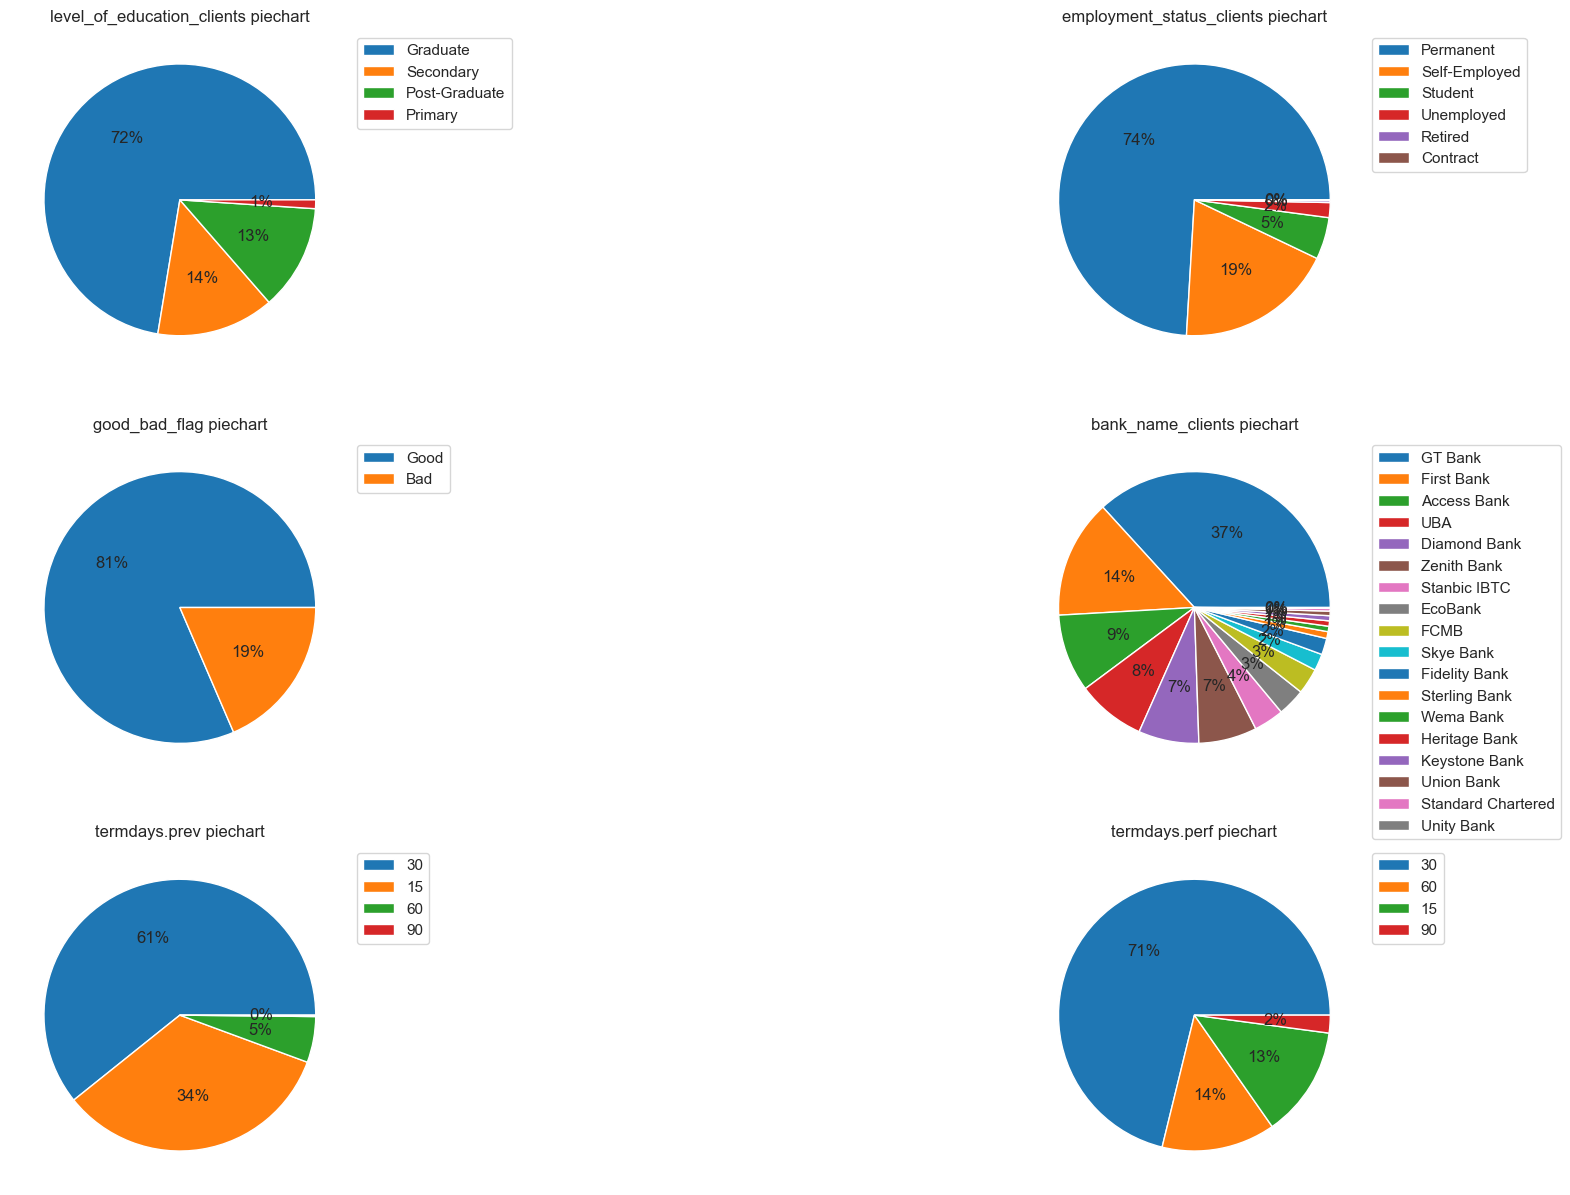

In [116]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(24, 15))
pie_cols = ['level_of_education_clients', 'employment_status_clients', 'good_bad_flag', 'bank_name_clients', 'termdays.prev', 'termdays.perf']
for i, ax in enumerate(axs.flatten()):
    pie(merged_data[pie_cols[i]], ax)

#### Distribution of numeric variables

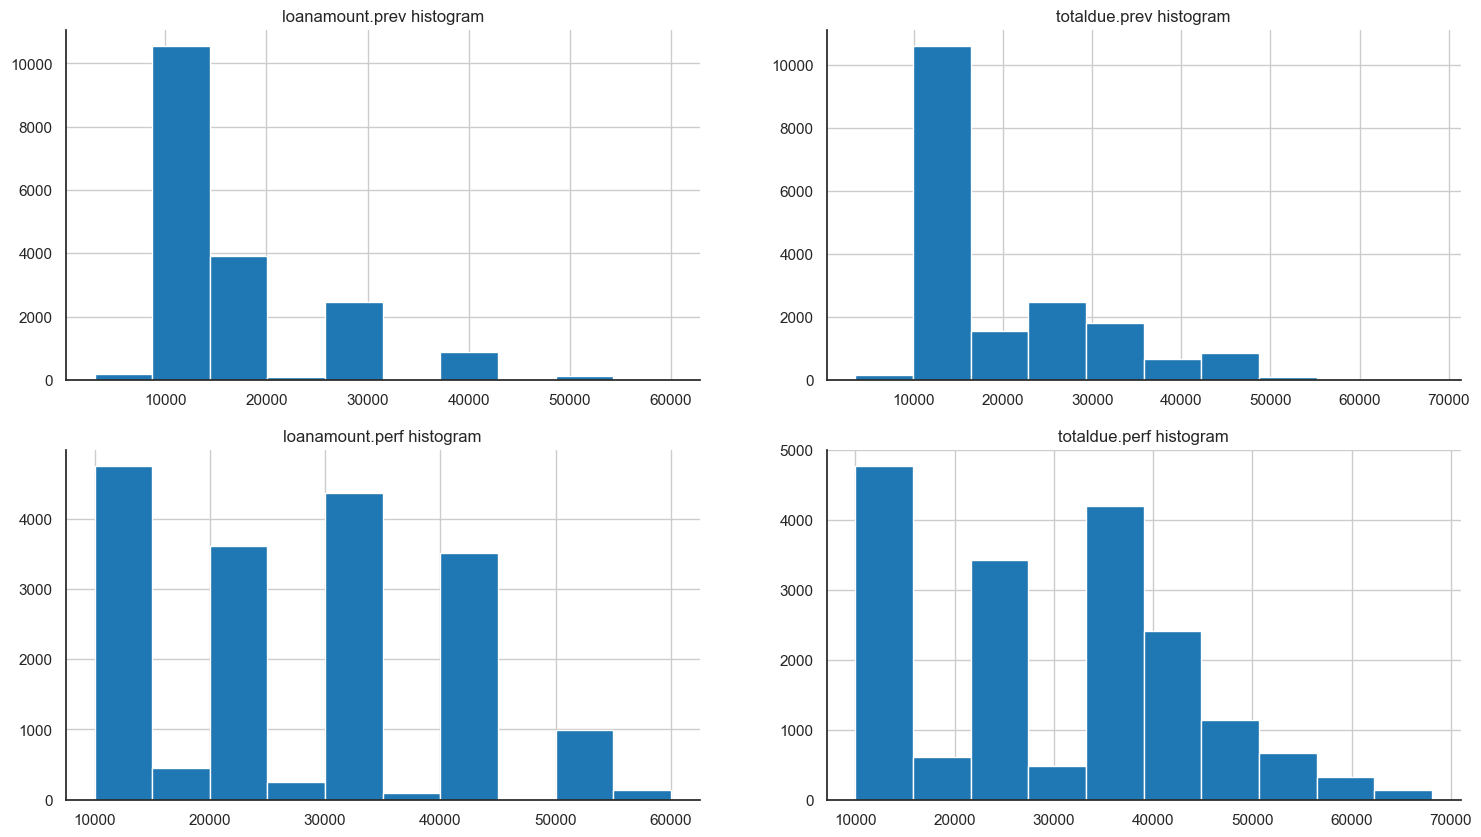

In [117]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(18, 10))
hist_cols = ['loanamount.prev', 'totaldue.prev', 'loanamount.perf', 'totaldue.perf']
for i, ax in enumerate(axs.flatten()):
    merged_data[hist_cols[i]].hist(ax=ax)
    ax.set_title(f'{hist_cols[i]} histogram')

#### Distribution of customers

In [118]:
import plotly.express as px

fig = px.scatter_mapbox(merged_data, lat='latitude_gps', lon='longitude_gps', zoom=10)
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=10,  
    mapbox_center={"lat": merged_data['latitude_gps'].mean(), "lon": merged_data['longitude_gps'].mean()}  # Center the map around the data
)
fig.show();

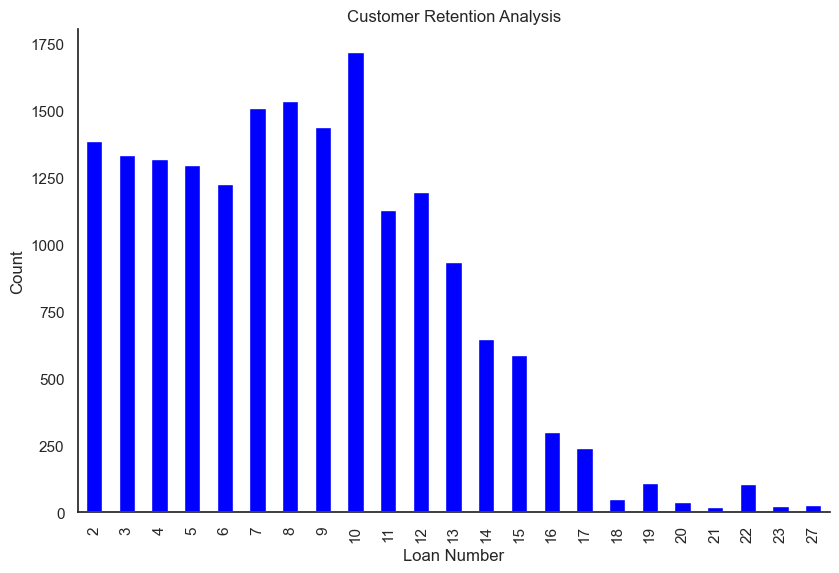

In [119]:
# Calculate customer retention
merged_data['retention'] = merged_data.groupby('customerid')['loannumber.perf'].transform('max')

# Countplot of customer retention
pd.crosstab(merged_data['loannumber.perf'], merged_data['retention']).plot(kind='bar', stacked=True, color='blue', legend=None)
plt.xlabel('Loan Number')
plt.ylabel('Count')
plt.title('Customer Retention Analysis')
plt.show()

* Customer Retention Analysis assesses the longevity of customer relationships with the loan service
*  Customers taking a loans from 2 to 12 indicate a strong relationship with the loan service since during this period customers return for multiple loans.
* The decrease in customer numbers after loan number 12 could be due to:
    1. Customers may have fulfilled their borrowing needs.
    2. Customers may have reached their credit limits that prevents them from taking out more loans
    3. Some customers may have been lost due to changing financial circumstances, or dissatisfaction with the service

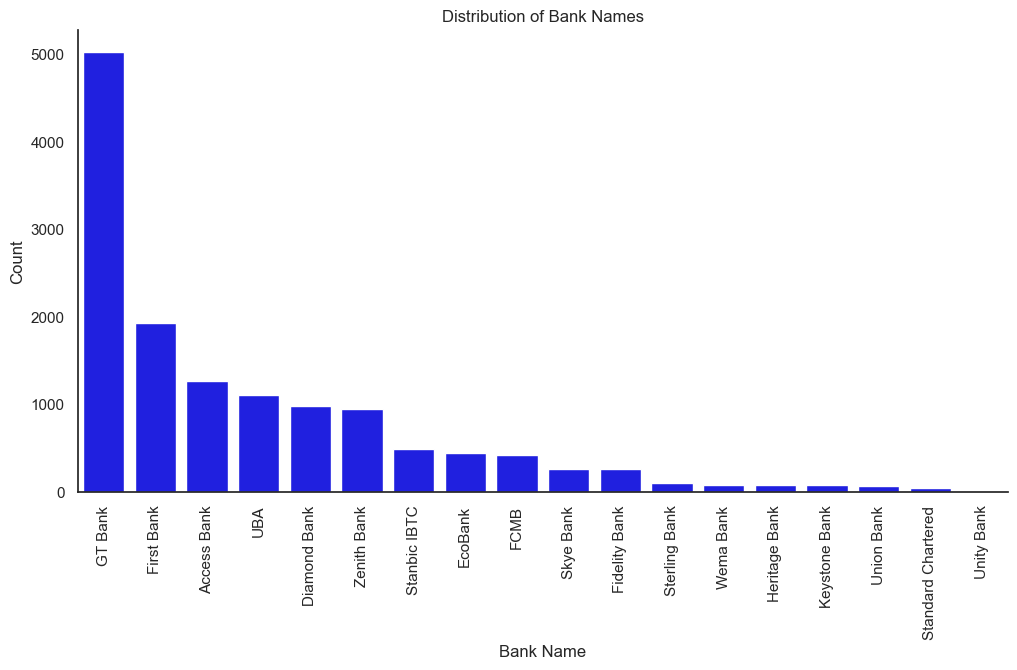

In [120]:
# Distribution of customers among different banks.
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_data, x='bank_name_clients',color='blue', order=merged_data['bank_name_clients'].value_counts().index)
plt.xlabel('Bank Name')
plt.ylabel('Count')
plt.title('Distribution of Bank Names')
plt.xticks(rotation=90)
plt.show()

### Bivariate EDA

Correlation matrix to understand the linear relationships between numerical variables and the target variable (good_bad_flag)

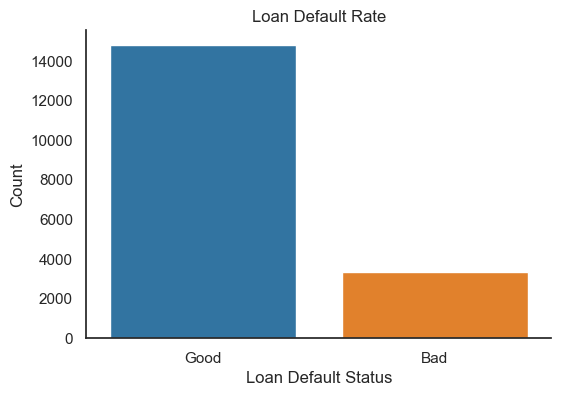

In [121]:
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_data, x='good_bad_flag')
plt.xlabel('Loan Default Status')
plt.ylabel('Count')
plt.title('Loan Default Rate')
plt.show()

In [122]:
# Defined a function to identify numerical columns
def find_numeric_cols(df):
  # Select only the numeric columns
  numeric_cols = df.select_dtypes(include="number")
  # Get the column names as a list
  numeric_col_names = numeric_cols.columns.tolist()
  # Return the list of numeric column names
  return numeric_col_names

In [123]:
# Call the function to find numerical columns
numeric_col_names = find_numeric_cols(merged_data)

# Print the result
print("The numerical columns in the dataset are:")
print(numeric_col_names)

The numerical columns in the dataset are:
['systemloanid.prev', 'loannumber.prev', 'loanamount.prev', 'totaldue.prev', 'termdays.prev', 'longitude_gps', 'latitude_gps', 'systemloanid.perf', 'loannumber.perf', 'loanamount.perf', 'totaldue.perf', 'termdays.perf', 'retention']


#### Correlation heatmap of high correlated features

C:\Users\Frankline\AppData\Local\Temp\ipykernel_21824\2890866878.py:11: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



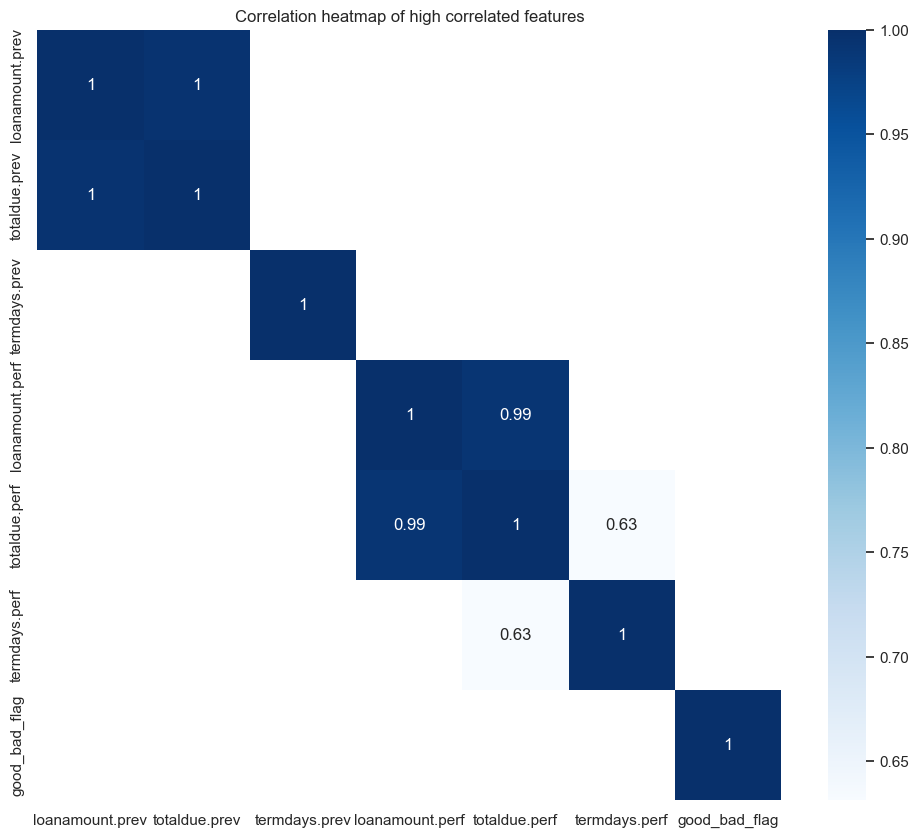

In [124]:
# Select the numerical columns and the target column
num_cols = ['loanamount.prev', 'totaldue.prev', 'termdays.prev', 'loanamount.perf', 'totaldue.perf', 
             'termdays.perf','birthdate']

target_col = "good_bad_flag"

# Convert the target column to a binary numeric column
merged_data[target_col] = merged_data[target_col].map({"Good": 1, "Bad": 0})

# Calculate the Pearson's correlation coefficients
corr_matrix = merged_data[num_cols + [target_col]].corr()

# Set the threshold value for high correlation
threshold = 0.6

# Filter the correlation matrix by the threshold value
high_corr_matrix = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]

# Plot the heatmap of the filtered matrix
plt.figure(figsize=(12, 10))
sns.heatmap(high_corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation heatmap of high correlated features")
plt.show()  

from the heatmap above we find that columns that exibit a high correlation with the target variable;
       - `totaldue.perf`
       -  `loanamount.prev`
       -  `approved_month`
       -  `month`
       -  `loanamount.perf`
       -  `totaldue.prev`
       -  `year`
       -  `month`

#### Creating a contingency table of employment status and loan repayment status

In [125]:
cross_tab = pd.crosstab(merged_data['employment_status_clients'], merged_data['good_bad_flag'])
print(cross_tab)

good_bad_flag                 0     1
employment_status_clients            
Contract                      0    10
Permanent                  1646  7472
Retired                       0    29
Self-Employed               347  1972
Student                     140   475
Unemployed                   40   179


In [126]:
# plt.title('Bar plot of ' + crosstab.index.name + ' vs ' + ', '.join([str(x) for x in crosstab.columns]))

# plt.title('Bar plot of ' + crosstab.index.name + ' vs ' + ', '.join(crosstab.columns))

In [127]:
# Calculate the mean loan amount and term days for each group
mean_loan_amount = merged_data.groupby("good_bad_flag")["loanamount.perf"].mean()
mean_term_days = merged_data.groupby("good_bad_flag")["termdays.perf"].mean()

# Print the results
print("Mean loan amount by loan performance:")
print(mean_loan_amount)
print("Mean term days by loan performance:")
print(mean_term_days)

# Create a cross-tabulation table for employment status and loan performance
ct_employment = pd.crosstab(merged_data["employment_status_clients"], merged_data["good_bad_flag"])

# Print the results
print("Cross-tabulation of employment status and loan performance:")
print(ct_employment)

# Create a cross-tabulation table for level of education and loan performance
ct_education = pd.crosstab(merged_data["level_of_education_clients"], merged_data["good_bad_flag"])

# Print the results
print("Cross-tabulation of level of education and loan performance:")
print(ct_education)

Mean loan amount by loan performance:
good_bad_flag
0    22790.973872
1    26316.571043
Name: loanamount.perf, dtype: float64
Mean term days by loan performance:
good_bad_flag
0    33.852435
1    33.228822
Name: termdays.perf, dtype: float64
Cross-tabulation of employment status and loan performance:
good_bad_flag                 0     1
employment_status_clients            
Contract                      0    10
Permanent                  1646  7472
Retired                       0    29
Self-Employed               347  1972
Student                     140   475
Unemployed                   40   179
Cross-tabulation of level of education and loan performance:
good_bad_flag                 0     1
level_of_education_clients           
Graduate                    415  2093
Post-Graduate                89   346
Primary                       1    35
Secondary                   120   365


from the above analysis we found out that;

* The majority of the customers are permanent employees, followed by self-employed, students, unemployed, retired and contract workers. The proportion of good customers is higher than bad customers in every employment category, except for contract workers, who have no bad customers at all. This indicates that employment status is an important factor for loan performance.
* Customers who have good loan performance tend to borrow more money than those who have bad loan performance. The mean loan amount for good customers is 26316.57 while the mean loan amount for bad customers is 22790.97. This suggests that good customers have higher income or creditworthiness than bad customers
* The level of education of the customers is mostly graduate, followed by secondary, post-graduate and primary. The proportion of good customers is higher than bad customers in every education level, except for primary, who have only one bad customer and 35 good customers. This suggests that level of education is also a relevant factor for loan performance
* The mean term days for both groups are similar, around 33 days. This means that the duration of the loan does not have a significant impact on the loan performance.

### Visualizing and measuring the relationship between previous and current loan amounts

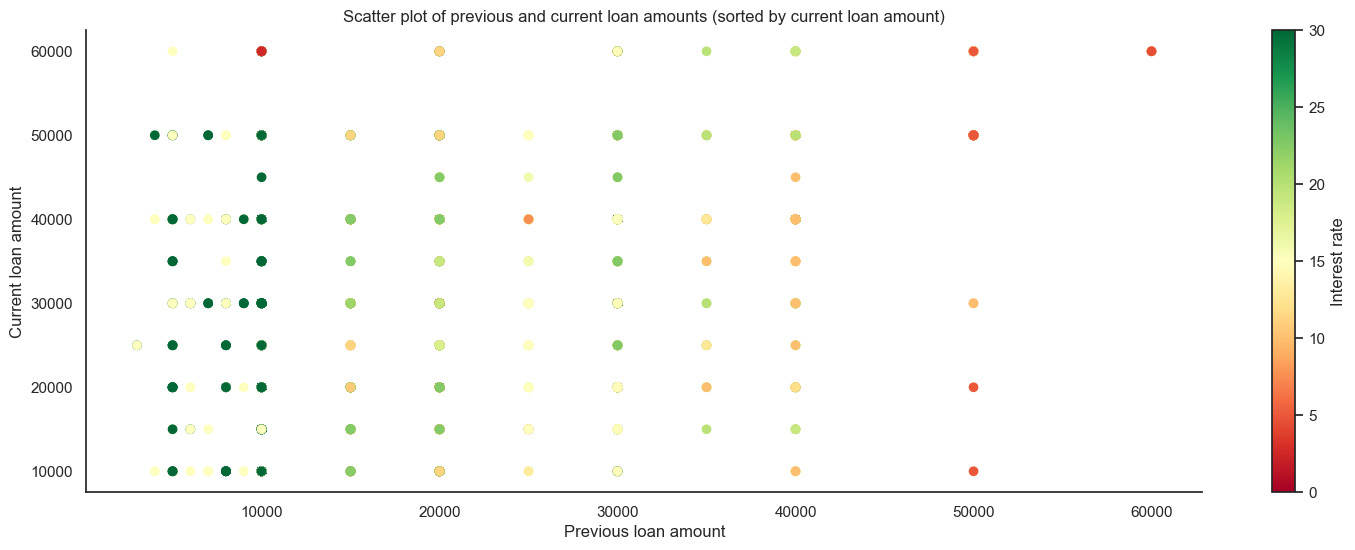

The correlation coefficient between previous and current loan amounts is 0.57


In [128]:
# Create interest_rate column using totaldue.prev and loanamount.prev
merged_data["interest_rate"] = (merged_data["totaldue.prev"] - merged_data["loanamount.prev"]) / merged_data["loanamount.prev"] * 100

# Scatter plot
plt.figure(figsize=(18,6))

# Sort the dataframe by current loan amount in descending order
sorted_data = merged_data.sort_values(by="loanamount.perf", ascending=False)

# Plot the scatter plot using the sorted dataframe
plt.scatter(sorted_data["loanamount.prev"], sorted_data["loanamount.perf"], c=sorted_data["interest_rate"], cmap="RdYlGn")
plt.xlabel("Previous loan amount")
plt.ylabel("Current loan amount")
plt.title("Scatter plot of previous and current loan amounts (sorted by current loan amount)")
plt.colorbar(label="Interest rate")
plt.show()

# Correlation coefficient
corr = np.corrcoef(sorted_data["loanamount.prev"], sorted_data["loanamount.perf"])[0,1]
print(f"The correlation coefficient between previous and current loan amounts is {corr:.2f}")

the interest rate charged on a loan reflects the implied probability of default, assuming a zero recovery rate.This means that the higher the interest rate, the higher the risk of default that the lender expects.

The red points indicate high interest rates and high risk of default, while the green points indicate low interest rates and low risk of default. We can see that there is a negative correlation between the previous and current loan amounts and the interest rate, meaning that borrowers who have larger loans tend to have lower interest rates and lower risk of default.

#### Creating a time series line plot of monthly loan payment trend

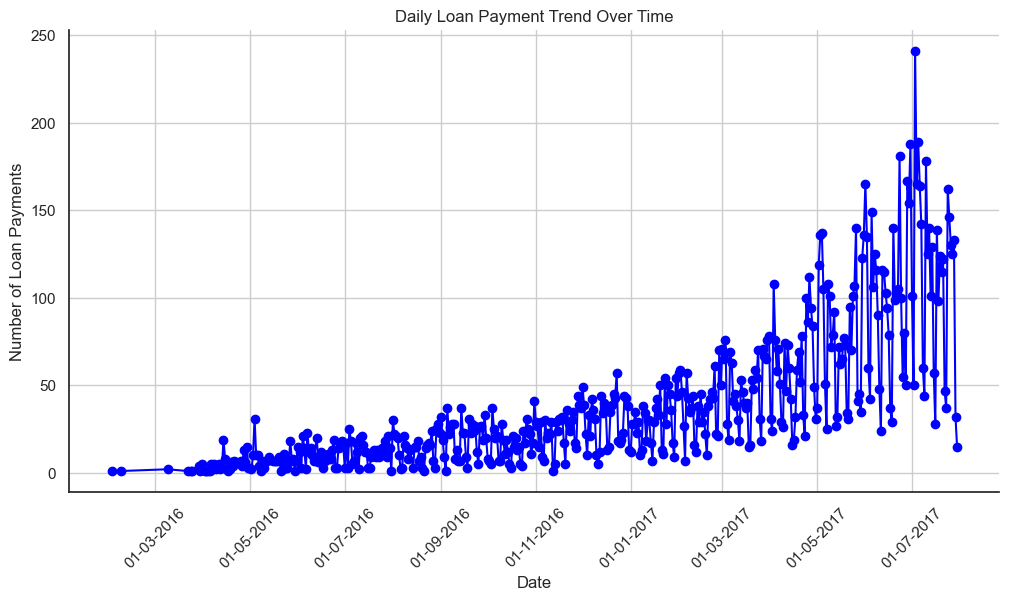

In [129]:
import matplotlib.dates as mdates

# Convert date columns to datetime objects
date_columns = ['firstduedate', 'firstrepaiddate']
for col in date_columns:
    merged_data[col] = pd.to_datetime(merged_data[col])

# Create a new column called 'date' that contains only the date part of 'firstrepaiddate'
merged_data['date'] = merged_data['firstrepaiddate'].dt.date

# Group data by date and count the number of loan payments
daily_payment_counts = merged_data.groupby('date')['firstrepaiddate'].count().reset_index()

# Create a time series line plot
plt.figure(figsize=(12, 6))
plt.plot(daily_payment_counts['date'], daily_payment_counts['firstrepaiddate'], marker='o', linestyle='-', color='b')
plt.title('Daily Loan Payment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Loan Payments')
plt.grid(True)

# Format the x-axis labels as day, month, and year
myFmt = mdates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.xticks(rotation=45)

plt.show()

* From the graph we conclude that their is an increase in trend in monthly loan repayment overtime most loans are bieng repayed over the course of the month

### Multivariate analysis

#### Creating a contingency table of employment status,level of education and loan number

Next we will perform multivariate analysis to comeup with more insights about the data.We will begin with creating a crosstab with employment status and level of education as the index and the loannumber.perf as the value column.We want to visualize each group with the number of loans taken.The loannumber.perf column has the most recent loan number hence, it was the prefered column.

In [130]:
crosstab_df = pd.crosstab(index=[merged_data['employment_status_clients'],
                                 merged_data['level_of_education_clients']],
                         columns='loannumber.perf',
                         values=merged_data['loannumber.perf'],
                         aggfunc='sum')
crosstab_df.sort_values(by='loannumber.perf',ascending=False,inplace=True)
crosstab_df


col_0                                                 loannumber.perf
employment_status_clients level_of_education_clients                 
Permanent                 Graduate                              16128
Self-Employed             Graduate                               8726
Permanent                 Post-Graduate                          3327
                          Secondary                              2517
Self-Employed             Secondary                              2356
Student                   Graduate                               1507
Self-Employed             Post-Graduate                          1384
Unemployed                Graduate                                888
Student                   Post-Graduate                           422
Unemployed                Secondary                               328
Permanent                 Primary                                 224
Retired                   Graduate                                156
Student                   Secondary                               132
Self-Employed             Primary                                  54

In [131]:
# Creating a function to plot the crosstab_df
def plot_crosstab(crosstab):
    # Create a bar plot
    plt.figure(figsize=(15, 10))
    crosstab.plot(kind='bar')

    # Add labels and title
    plt.xlabel('Employment status and level of education')
    plt.ylabel('Count')
    plt.title('Bar graph of employment status and level of education vs number of loans taken')

    # Show the plot
    plt.show();


<Figure size 1500x1000 with 0 Axes>

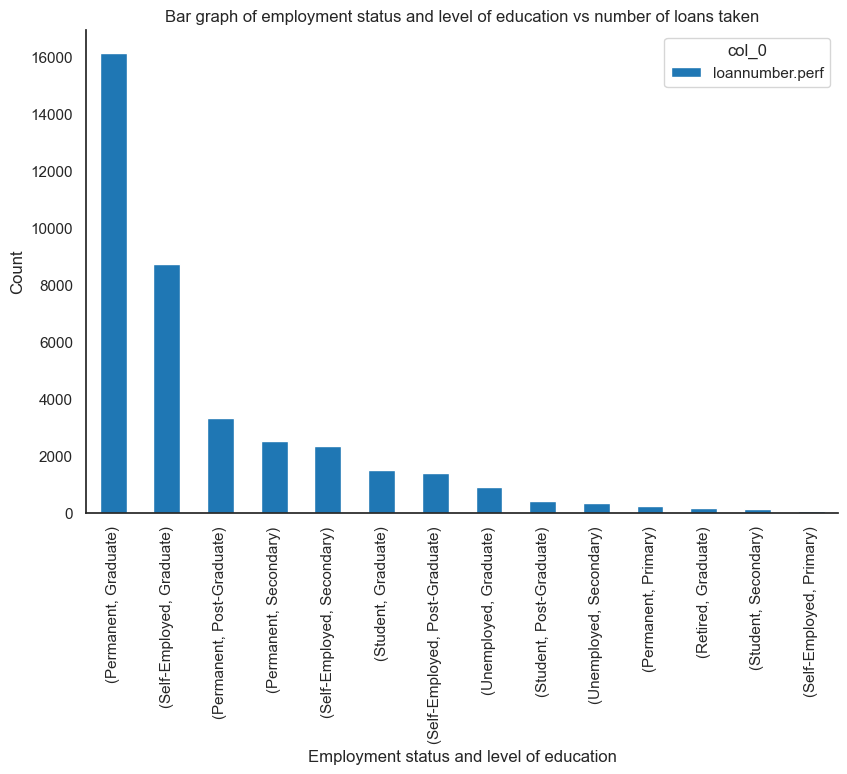

In [132]:
# Visualising the crosstab
plot_crosstab(crosstab_df)

From the graph it can be seen that clients who are graduates with permament jobs tend to take more loans than the other groups.Self employed clients with only primary as the highest level of education take have fewer number of loans.This is due to the fact that graduates with permanent jobs have a higher income that enables them to finish paying loans and take more loans.

In [133]:
categorical_data = merged_data.select_dtypes(include='object')
categorical_data.head()

,customerid,approveddate.prev,creationdate.prev,closeddate,birthdate,bank_account_type,bank_name_clients,employment_status_clients,level_of_education_clients,approveddate.perf,creationdate.perf,date
0,8a2a81a74ce8c05d014cfb32a0da1049,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,2016-09-01 16:06:48.000000,1972-01-15 00:00:00.000000,Other,Diamond Bank,Permanent,Post-Graduate,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,2016-09-01
1,8a2a81a74ce8c05d014cfb32a0da1049,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,2017-05-28 14:44:49.000000,1972-01-15 00:00:00.000000,Other,Diamond Bank,Permanent,Post-Graduate,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,2017-05-26
2,8a2a81a74ce8c05d014cfb32a0da1049,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,2017-04-26 22:18:56.000000,1972-01-15 00:00:00.000000,Other,Diamond Bank,Permanent,Post-Graduate,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,2017-04-26
3,8a8588f35438fe12015444567666018e,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,2017-04-24 01:35:52.000000,1984-09-18 00:00:00.000000,Other,EcoBank,Permanent,NaN,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,2017-04-24
4,8a85890754145ace015429211b513e16,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,2017-07-14 21:18:43.000000,1977-10-10 00:00:00.000000,Savings,First Bank,Permanent,NaN,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,2017-07-14


In [134]:
numerical_data = merged_data.select_dtypes(include='number')
numerical_data.head()

,systemloanid.prev,loannumber.prev,loanamount.prev,totaldue.prev,termdays.prev,longitude_gps,latitude_gps,systemloanid.perf,loannumber.perf,loanamount.perf,totaldue.perf,termdays.perf,good_bad_flag,retention,interest_rate
0,301682320,2,10000.0,13000.0,30,3.43201,6.433055,301994762,12,30000.0,34500.0,30,1,12,30.0
1,301883808,9,10000.0,13000.0,30,3.43201,6.433055,301994762,12,30000.0,34500.0,30,1,12,30.0
2,301831714,8,20000.0,23800.0,30,3.43201,6.433055,301994762,12,30000.0,34500.0,30,1,12,19.0
3,301861541,5,10000.0,11500.0,15,11.13935,10.292041,301966580,7,20000.0,22250.0,15,1,7,15.0
4,301941754,2,10000.0,11500.0,15,3.98577,7.491708,301999343,3,10000.0,11500.0,15,1,3,15.0


#### Creating a contingency table of bank name,bank account type and current loan amount

In [135]:
crosstab_bank = pd.crosstab(index=[merged_data['bank_name_clients'],
                                 merged_data['bank_account_type']],
                         columns='loanamount.perf',
                         values=merged_data['loanamount.perf'],
                         aggfunc='sum')
crosstab_bank.sort_values(by='loanamount.perf',ascending=False,inplace=True)
crosstab_bank


col_0                                 loanamount.perf
bank_name_clients  bank_account_type                 
GT Bank            Other                   74620000.0
                   Savings                 56425000.0
First Bank         Savings                 28440000.0
                   Other                   20910000.0
Access Bank        Savings                 18850000.0
Zenith Bank        Savings                 14445000.0
UBA                Other                   14240000.0
Diamond Bank       Other                   13890000.0
                   Savings                 13415000.0
UBA                Savings                 13415000.0
Access Bank        Other                   12015000.0
Zenith Bank        Other                    9465000.0
Stanbic IBTC       Savings                  7110000.0
EcoBank            Savings                  6385000.0
FCMB               Other                    5910000.0
                   Savings                  5625000.0
Skye Bank          Savings                  4610000.0
Fidelity Bank      Savings                  4320000.0
Stanbic IBTC       Other                    4310000.0
EcoBank            Other                    4200000.0
Wema Bank          Savings                  2025000.0
Skye Bank          Other                    1855000.0
Keystone Bank      Savings                  1760000.0
Fidelity Bank      Other                    1630000.0
Sterling Bank      Savings                  1620000.0
Heritage Bank      Other                    1260000.0
Union Bank         Other                    1110000.0
Heritage Bank      Savings                   990000.0
Keystone Bank      Other                     680000.0
Union Bank         Savings                   680000.0
Standard Chartered Other                     650000.0
FCMB               Current                   580000.0
GT Bank            Current                   550000.0
First Bank         Current                   540000.0
Fidelity Bank      Current                   510000.0
Stanbic IBTC       Current                   480000.0
UBA                Current                   430000.0
Standard Chartered Savings                   345000.0
Sterling Bank      Other                     220000.0
Unity Bank         Savings                   150000.0
Wema Bank          Other                     150000.0
Zenith Bank        Current                   150000.0
Unity Bank         Other                      75000.0
Diamond Bank       Current                    60000.0
Sterling Bank      Current                    55000.0
Access Bank        Current                    30000.0
Union Bank         Current                    20000.0
Standard Chartered Current                    20000.0
EcoBank            Current                    20000.0

In [136]:
# Creating a function to plot the crosstab_df
def plot_crosstab(crosstab):
    # Create a bar plot
    plt.figure(figsize=(15, 10))
    crosstab.plot(kind='bar')

    # Add labels and title
    plt.xlabel('Bank and bank account type')
    plt.ylabel('Loan amount')
    plt.title('Bar graph of bank and bank account type vs number of loans taken')

    # Show the plot
    plt.show();

<Figure size 1500x1000 with 0 Axes>

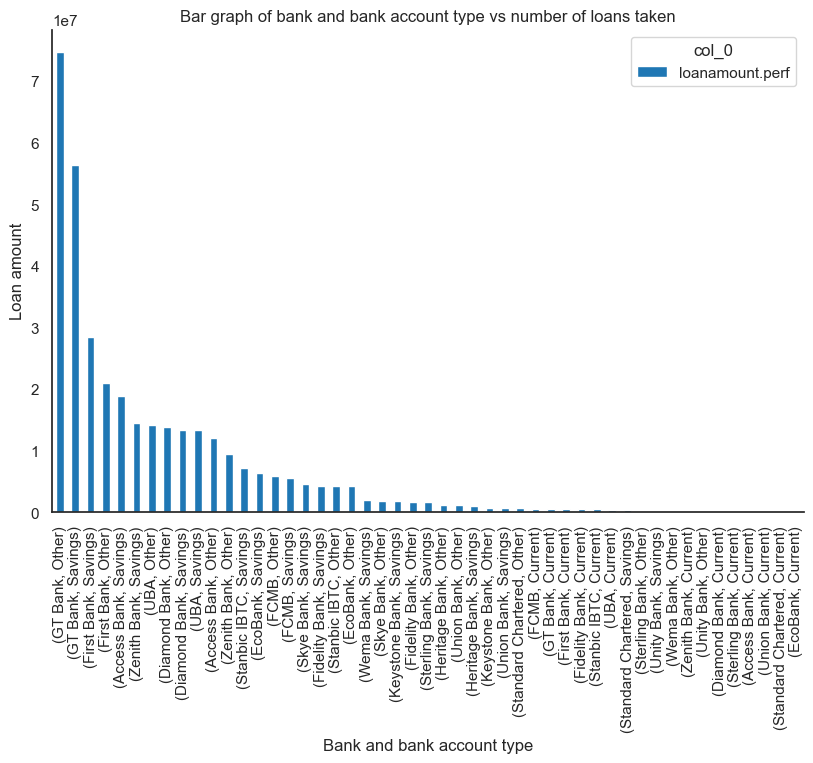

In [137]:
plot_crosstab(crosstab_bank)

From the graph above it can be seen that GT Bank clients with 'Other' and 'Savings' bank account type tend to get huge loan amounts compared to the rest of the groups. We can also create a new crosstab to know which group receives large term days.

#### Creating a contingency table of bank name,bank account type and current term days

In [138]:
def plot_crosstab(crosstab):
    # Create a bar plot
    plt.figure(figsize=(15, 10))
    crosstab.plot(kind='bar')

    # Add labels and title
    plt.xlabel('Bank and bank account type')
    plt.ylabel('Term days')
    plt.title('Bar graph of bank and bank account type vs term days')

    # Show the plot
    plt.show();

In [139]:
# Creating a crosstab
crosstab_term = pd.crosstab(index=[merged_data['bank_name_clients'],
                                 merged_data['bank_account_type']],
                         columns='termdays.perf',
                         values=merged_data['termdays.perf'],
                         aggfunc='sum')
crosstab_term.sort_values(by='termdays.perf',ascending=False,inplace=True)
crosstab_term


col_0                                 termdays.perf
bank_name_clients  bank_account_type               
GT Bank            Other                      83925
                   Savings                    83385
First Bank         Savings                    37665
Access Bank        Savings                    26325
First Bank         Other                      22770
UBA                Savings                    19845
Zenith Bank        Savings                    18660
Diamond Bank       Savings                    18150
UBA                Other                      16185
Diamond Bank       Other                      15945
Access Bank        Other                      15165
Zenith Bank        Other                      11340
Stanbic IBTC       Savings                    10125
EcoBank            Savings                     9645
FCMB               Other                       9150
                   Savings                     8460
Skye Bank          Savings                     6585
Fidelity Bank      Savings                     6015
Stanbic IBTC       Other                       5250
EcoBank            Other                       4710
Skye Bank          Other                       2970
Wema Bank          Savings                     2550
Sterling Bank      Savings                     2445
Keystone Bank      Savings                     2025
Fidelity Bank      Other                       1995
Heritage Bank      Savings                     1455
                   Other                       1410
Union Bank         Savings                     1110
Keystone Bank      Other                        960
Union Bank         Other                        915
First Bank         Current                      855
GT Bank            Current                      840
Standard Chartered Other                        810
                   Savings                      690
Stanbic IBTC       Current                      645
UBA                Current                      600
FCMB               Current                      480
Fidelity Bank      Current                      450
Sterling Bank      Other                        375
Wema Bank          Other                        300
Unity Bank         Savings                      270
Zenith Bank        Current                      270
Diamond Bank       Current                      120
Sterling Bank      Current                       75
Unity Bank         Other                         75
Access Bank        Current                       75
Union Bank         Current                       60
Standard Chartered Current                       60
EcoBank            Current                       30

<Figure size 1500x1000 with 0 Axes>

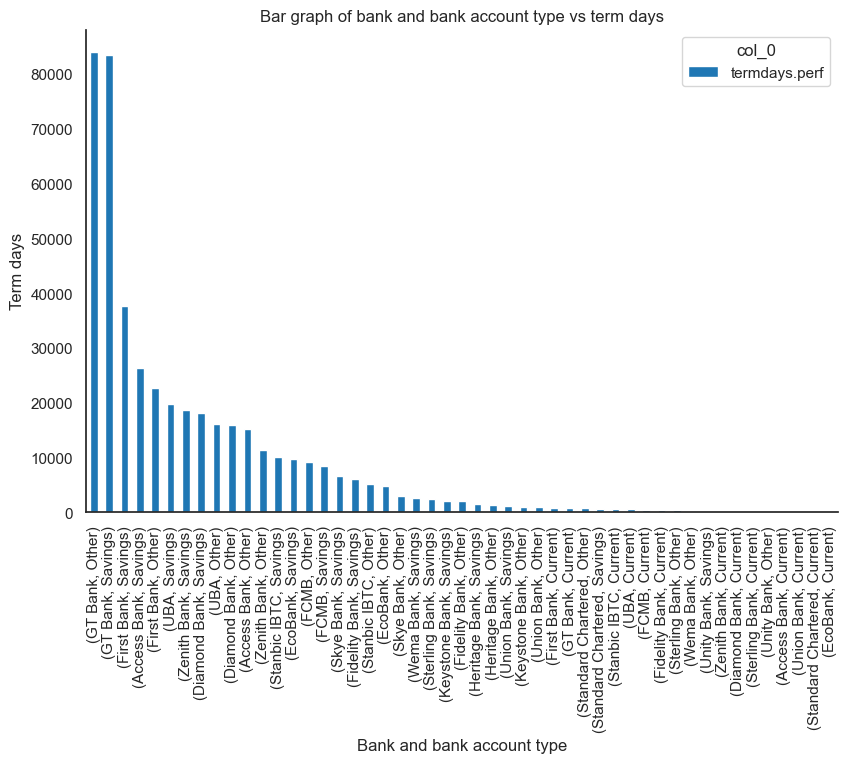

In [140]:
plot_crosstab(crosstab_term)

GT bank clients with 'Other' or 'Savings'account tend to receive larger term days compared to the rest of the groups.

#### Creating a contingency table of employment status,level of education and term days

In [141]:
crosstab_client_term = pd.crosstab(index=[merged_data['employment_status_clients'],
                                 merged_data['level_of_education_clients']],
                         columns='termdays.perf',
                         values=merged_data['termdays.perf'],
                         aggfunc='sum')
crosstab_client_term.sort_values(by='termdays.perf',ascending=False,inplace=True)
crosstab_client_term

col_0                                                 termdays.perf
employment_status_clients level_of_education_clients               
Permanent                 Graduate                            58005
Self-Employed             Graduate                            26730
Permanent                 Post-Graduate                       11550
                          Secondary                            9300
Self-Employed             Secondary                            7650
Student                   Graduate                             5670
Self-Employed             Post-Graduate                        3705
Unemployed                Graduate                             3255
Student                   Post-Graduate                        1800
Permanent                 Primary                               795
Unemployed                Secondary                             690
Student                   Secondary                             450
Retired                   Graduate                              360
Self-Employed             Primary                               270

In [142]:
def plot_crosstab(crosstab):
    # Create a bar plot
    plt.figure(figsize=(15, 10))
    crosstab.plot(kind='bar')

    # Add labels and title
    plt.xlabel('Employment status and level of education')
    plt.ylabel('Term days')
    plt.title('Bar graph of employment status and level of education vs term days')

    # Show the plot
    plt.show();

<Figure size 1500x1000 with 0 Axes>

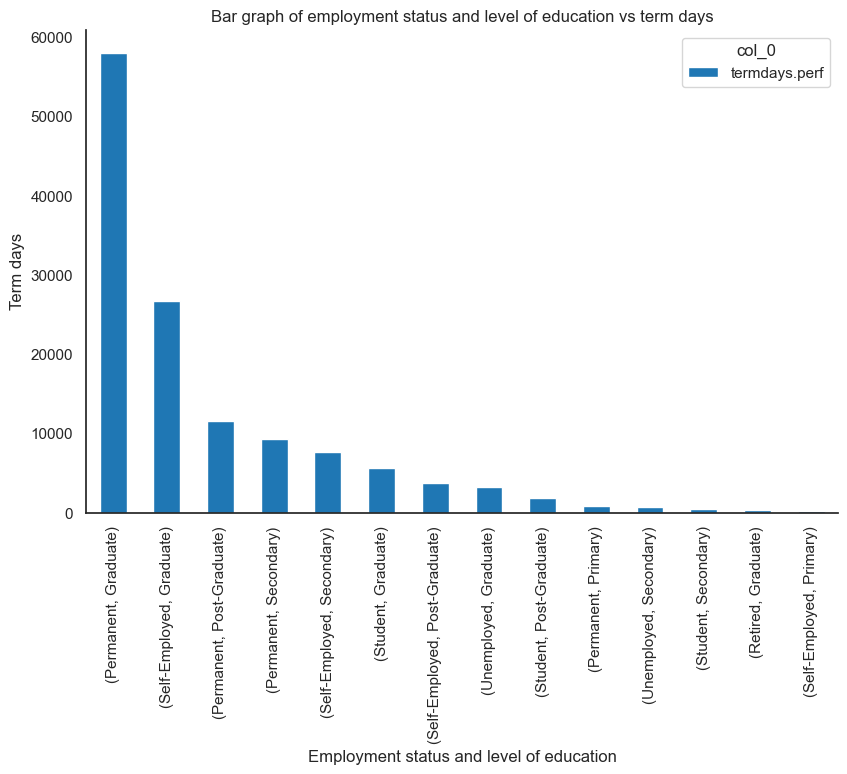

In [143]:
plot_crosstab(crosstab_client_term)

Graduates with permanent jobs get larger term days compared to the rest of the groups.

#### Creating a contingency table of employment status,level of education and current loan amount

In [144]:
crosstab_client_amount = pd.crosstab(index=[merged_data['employment_status_clients'],
                                 merged_data['level_of_education_clients']],
                         columns='loanamount.perf',
                         values=merged_data['loanamount.perf'],
                         aggfunc='sum')
crosstab_client_amount.sort_values(by='loanamount.perf',ascending=False,inplace=True)
crosstab_client_amount

,col_0,loanamount.perf
employment_status_clients,level_of_education_clients,
Permanent,Graduate,47535000.0
Self-Employed,Graduate,25185000.0
Permanent,Post-Graduate,9925000.0
Self-Employed,Secondary,6575000.0
Permanent,Secondary,6495000.0
Student,Graduate,4315000.0
Self-Employed,Post-Graduate,4050000.0
Unemployed,Graduate,2055000.0
Student,Post-Graduate,1340000.0


In [145]:
def plot_crosstab(crosstab):
    # Create a bar plot
    plt.figure(figsize=(15, 10))
    crosstab.plot(kind='bar')

    # Add labels and title
    plt.xlabel('Employment status and level of education')
    plt.ylabel('Loan amount')
    plt.title('Bar graph of employment status and level of education vs current loan amount')

    # Show the plot
    plt.show();

<Figure size 1500x1000 with 0 Axes>

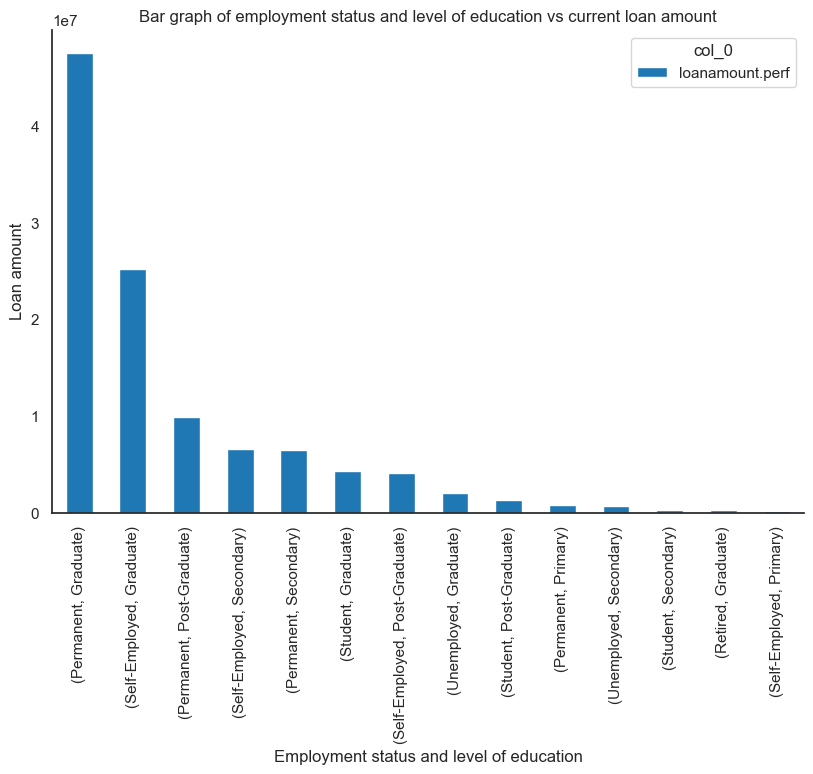

In [146]:
plot_crosstab(crosstab_client_amount)

Graduates with permanent jobs receive larger loan amounts compared to the rest of the groups.

## Feature Engineering

In [148]:
from datetime import datetime
# Calculate the Age of the Borrower
merged_data['birthdate'] = pd.to_datetime(merged_data['birthdate'])
current_date = datetime.now()
merged_data['age'] = (current_date - merged_data['birthdate']).astype('<m8[Y]')

In [149]:
# Loan History: Calculate Average Loan Amount, Total Due, and Loan Term
average_loan_amount = merged_data.groupby('customerid')['loanamount.prev'].mean()
average_total_due = merged_data.groupby('customerid')['totaldue.prev'].mean()
average_loan_term = merged_data.groupby('customerid')['termdays.prev'].mean()
merged_data['avg_loan_amount_prev'] = merged_data['customerid'].map(average_loan_amount)
merged_data['avg_total_due_prev'] = merged_data['customerid'].map(average_total_due)
merged_data['avg_loan_term_prev'] = merged_data['customerid'].map(average_loan_term)

In [150]:
#  Loan Term Consistency
merged_data['loan_term_consistency'] = (merged_data['termdays.prev'] == merged_data['termdays.perf']).astype(int)

In [151]:
merged_data['employment_status_clients'].value_counts()

Permanent        9118
Self-Employed    2319
Student           615
Unemployed        219
Retired            29
Contract           10
Name: employment_status_clients, dtype: int64

In [152]:
# Employment History:
# Create categorical features based on employment stability
merged_data['employment_stability'] = 'Unknown'  # Default to 'Unknown' for cases not covered

# Categorize into 'Stable,' 'Unstable,' and 'Unknown'
merged_data.loc[merged_data['employment_status_clients'].isin(['Permanent', 'Retired']), 'employment_stability'] = 'Stable'
merged_data.loc[merged_data['employment_status_clients'].isin(['Self-Employed', 'Contract']), 'employment_stability'] = 'Unstable'

# Drop the original 'employment_status_clients' column if no longer needed
merged_data.drop(columns=['employment_status_clients'], inplace=True)

In [153]:
merged_data['employment_stability'].value_counts()

Stable      9147
Unknown     6707
Unstable    2329
Name: employment_stability, dtype: int64